# Qiskit Demonstration

Lets generate the entangled Bell state using Qiskit.

In [1]:
import numpy as np

# Imports
try:
  from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
  from qiskit.tools.monitor import job_monitor
  from qiskit.visualization import plot_histogram
  from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
  from qiskit.tools.monitor import job_monitor
  from qiskit.visualization import plot_histogram
except ImportError as e:
  print('Qiskit not installed, installing now ...')
  !pip install qiskit
  from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
  from qiskit.tools.monitor import job_monitor
  from qiskit.visualization import plot_histogram
  from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
  from qiskit.tools.monitor import job_monitor
  from qiskit.visualization import plot_histogram

Qiskit not installed, installing now ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 7.8 MB/s eta 0:00:00
  Created wheel

In [2]:
# Create a quantum register with two qubits
qreg_q = QuantumRegister(2, 'q')
# Create a register to store two classical values
creg_c = ClassicalRegister(2, 'c')
# Define a quantum circuit, using the two registers avove
circuit = QuantumCircuit(qreg_q, creg_c)

# Apply a Hadamard gate to the first qubit (index 0)
circuit.h(qreg_q[0])
# Apply a CNOT gate between the first qubit (control qubit) and the second qubit (target qubit)
circuit.cx(qreg_q[0], qreg_q[1])
# Measure the first qubit and store the result in the first classical register 
circuit.measure(qreg_q[0], creg_c[0])
# Measure the second qubit and store the result in the second classical register 
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [3]:
simulator = Aer.get_backend('aer_simulator_statevector')

job = execute(circuit, simulator, shots=1024)
job_monitor(job)

Job Status: job has successfully run


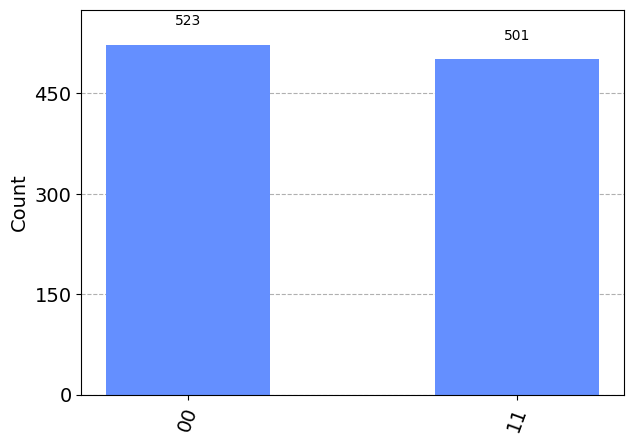

In [4]:
counts = job.result().get_counts()
plot_histogram(counts)